### Fit Fourier series on the inlet waveform ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy import interpolate
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Set plotting options
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [3]:
# Set input directory and file
input_directory = "/mnt/c/Users/csala/PhD/Research/LANL/data/"
input_file = "inlet_1d.flow"
# Read waveform
# Waveform is taken from CFD simulations from:
# Kim et al. (2010) - Patient-Specific Modeling of Blood Flow and Pressure in Human Coronary Arteries (Fig.3 – top right). 
# Left anterior descending (LAD) artery 
waveform = np.genfromtxt(input_directory + input_file,dtype = None)

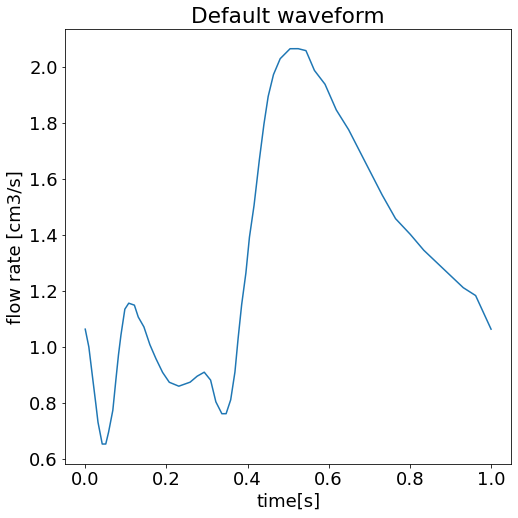

In [4]:
# Plot waveform

plt.plot(waveform[:,0],waveform[:,1])
plt.xlabel('time[s]')
plt.ylabel('flow rate [cm3/s]')
plt.title('Default waveform')

plt.show()

In [5]:
# number of points
n = waveform.shape[0]
# define the domain and the function
xorg = waveform[:,0]
forg = waveform[:,1]
# Put together two periods to avoid Gibbs/Runge phenomena at the sides
f = np.concatenate((forg[:-1],forg))
x = np.concatenate((xorg[:-1],xorg+1))

In [6]:
# Resample data uniformly using cubic interpolation

# set unform spacing
dx = 0.005
# end of x domain (time)
L = x[-1]
xnew = np.arange(x[0],L+dx,dx) #arange generates vectors [start,end), so we have to include the last point too
fcubic = interpolate.interp1d(x,f,kind = 'cubic') #use cubic interpolation
#interpolate to the new uniform grid
fnew = fcubic(xnew)

# number of uniform points
nnew = len(xnew)

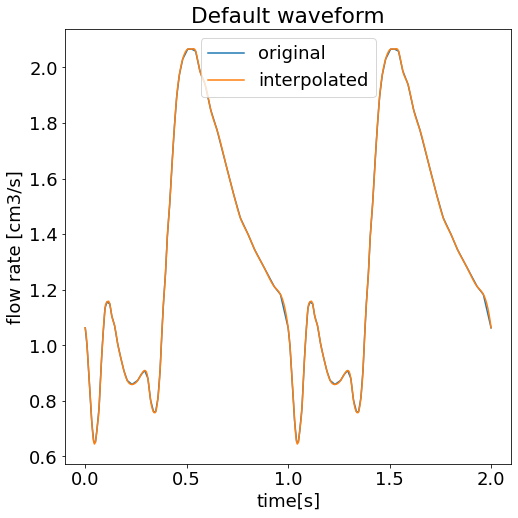

In [7]:
# Plot waveform and interpolated waveform for sanity-check

plt.plot(x,f)
plt.plot(xnew,fnew)
plt.xlabel('time[s]')
plt.ylabel('flow rate [cm3/s]')
plt.title('Default waveform')
plt.legend(('original','interpolated'))

plt.show()

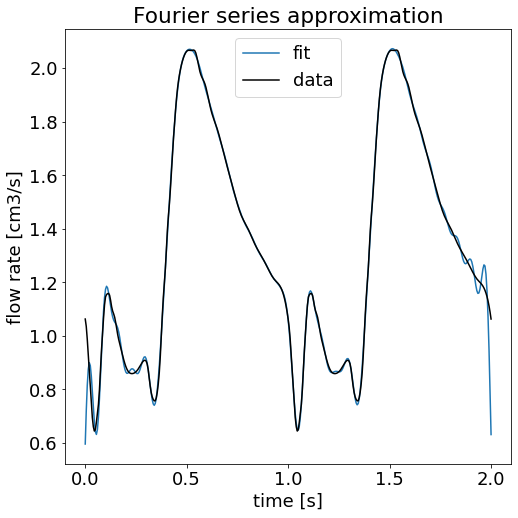

In [8]:
# compute the first coefficient
A0 = np.sum(fnew*np.ones_like(xnew))*dx/L
fFS = A0/2 * np.ones_like(fnew)

#define variables for coefficients
n_terms = 60 # number of terms in the Fourier series
A = np.zeros(n_terms)
B = np.zeros(n_terms)


for k in range(n_terms):
    A[k] = np.sum(fnew*np.cos(np.pi*(k+1)*xnew/L))*dx/L
    B[k] = np.sum(fnew*np.sin(np.pi*(k+1)*xnew/L))*dx/L
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*xnew/L) + B[k]*np.sin((k+1)*np.pi*xnew/L)
    

    
plt.plot(xnew,fFS)
plt.plot(xnew,fnew,'k')
plt.xlabel('time [s]')
plt.ylabel('flow rate [cm3/s]')
plt.legend(('fit','data'))
plt.title('Fourier series approximation')
plt.show()

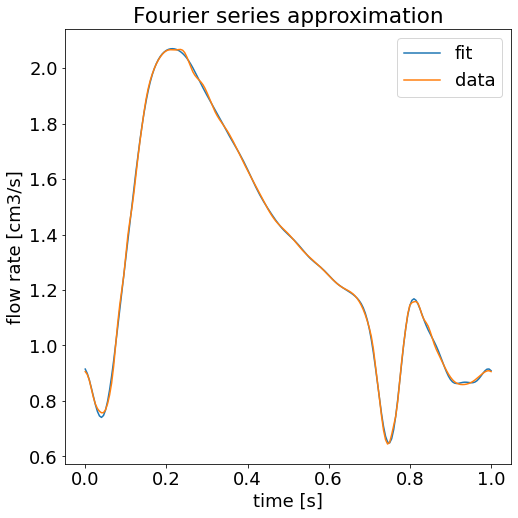

In [9]:
# select 1 period from the middle region where the fit is good
# this is to avoid the Gibbs phenomena at the sides
# set cutoff x where to start the new period
xcutoff = 60

#select the x and f values from the fit starting from xcutoff
xfit = xnew[xcutoff:(201+xcutoff)]-xnew[xcutoff]
ffit = fFS[xcutoff:(201+xcutoff)]

#compare fitted waveform to data in this new period
plt.plot(xfit,ffit)
plt.plot(xnew[:201],fnew[xcutoff:201+xcutoff])
plt.xlabel('time [s]')
plt.ylabel('flow rate [cm3/s]')
plt.title('Fourier series approximation')
plt.legend(('fit','data'))
plt.show()

In [19]:
# # select 1 period from the middle region where the fit is good
# # this is to avoid the Gibbs phenomena at the sides
# # set cutoff x where to start the new period
# xcutoff = 60

# #select the x and f values from the fit starting from xcutoff
# xfit = xnew[xcutoff:(201+xcutoff)]-xnew[xcutoff]
# ffit = fFS[xcutoff:(201+xcutoff)]

# #compare fitted waveform to data in this new period
# plt.plot(xfit,ffit,linewidth = 5,)
# # plt.plot(xnew[:201],fnew[xcutoff:201+xcutoff])
# plt.xlabel('time',fontsize = 28)
# plt.ylabel('flow rate', fontsize = 28)
# plt.xticks([])
# plt.yticks([])
# # plt.title('Fourier series approximation')
# # plt.legend(('fit','data'))
# plt.show()

### Generate plausible waveforms from Fourier series ###

In [18]:
f_list = []
k_list = []


a = [-2,-1.0,-0.5,0,0.5,1,1.5,1.75,2,2.5]
b = 1

c = 1
d = 1

for j in a:
    # compute the first coefficient
    A0 = np.sum(fnew*np.ones_like(xnew))*dx/L
    fFS = A0/2 * np.ones_like(fnew)
    #define variables for coefficients
    n_terms = 60 # number of terms in the Fourier series
    A = np.zeros(n_terms)
    B = np.zeros(n_terms)

    for k in range(n_terms):
        A[k] = np.sum(fnew*np.cos(np.pi*(k+1)*xnew/L))*dx/L*j
        B[k] = np.sum(fnew*np.sin(np.pi*(k+1)*xnew/L))*dx/L*b
        fFS = fFS + A[k]*np.cos((k+1)*np.pi*xnew/L*c) + B[k]*np.sin((k+1)*np.pi*xnew/L*d)
        
        if k==n_terms-1:
#         if k==n_terms-1:
            print("a: ",j, "k: ",k)
            f_list.append(fFS)
            k_list.append(k)
    

print('Number of  waveforms generated:',len(f_list))

a:  -2 k:  59
a:  -1.0 k:  59
a:  -0.5 k:  59
a:  0 k:  59
a:  0.5 k:  59
a:  1 k:  59
a:  1.5 k:  59
a:  1.75 k:  59
a:  2 k:  59
a:  2.5 k:  59
Number of  waveforms generated: 10


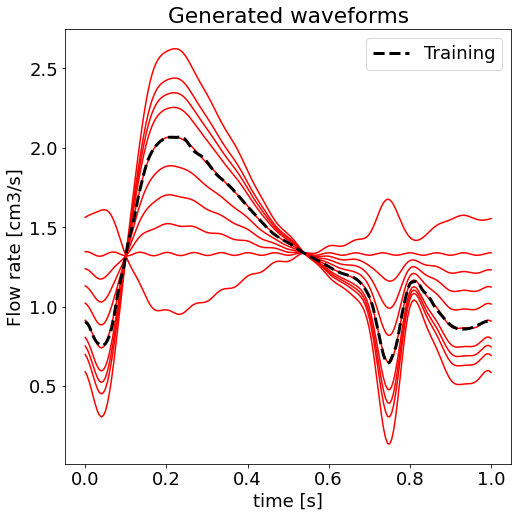

In [19]:
for i in range(len(f_list)):
    
    
    xfit = xnew[xcutoff:(201+xcutoff)]-xnew[xcutoff]
    ffit = f_list[i][xcutoff:(201+xcutoff)]
    if i%1==0:
        plt.plot(xfit,ffit, color = 'red')

plt.plot(xnew[:201],fnew[xcutoff:201+xcutoff],'k--', linewidth=3, label = label)
plt.xlabel('time [s]')
plt.ylabel('Flow rate [cm3/s]')
plt.title('Generated waveforms')
plt.legend()

plt.show()

In [20]:
# import matplotlib.pyplot as plt

# # Your existing code goes here
# plt.figure(figsize=(12, 6))
# # Create placeholder lines for each category
# training_line, = plt.plot([], [], color="blue", label="Training")
# interpolation_line, = plt.plot([], [], color="red", label="Interpolation")
# extrapolation_line, = plt.plot([], [], color="darkgreen", label="Extrapolation")
# original_data_line, = plt.plot([],[], 'k--', linewidth=3, label="Reference")

# # Initialize lists to store the data for the legend
# legend_data = [training_line, interpolation_line, extrapolation_line, original_data_line]

# for i in range(len(f_list)):
#     xfit = xnew[xcutoff:(201+xcutoff)] - xnew[xcutoff]
#     ffit = f_list[i][xcutoff:(201+xcutoff)]
#     if i <= 6 or i >= 42:  # extrapolation testing
#         color = "darkgreen"
#     elif 25 <= i <= 30:  # interpolation testing
#         color = "red"
#     else:  # training data
#         color = "blue"
#     if i % 1 == 0:
#         plt.plot(xfit, ffit, color=color)

# plt.xlabel('time [s]')
# plt.ylabel('Flow rate [cm3/s]')
# plt.title('Generated waveforms')

# original_data_line, = plt.plot(xnew[:201], fnew[xcutoff:201+xcutoff], 'k--', linewidth=3, label="Reference")
# # Create the legend with the pre-defined lines and labels
# plt.legend(handles=legend_data)
# plt.savefig('waveforms.svg', format = 'svg')
# plt.show()


#### Create animation for the different waveforms ####

In [21]:
# Create the figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [])

%matplotlib inline
# Set the axis limits
ax.set_xlim(0, 1)
ax.set_ylim(np.min(f_list), np.max(f_list))  # Update this line if necessary
ax.set_xlabel('Time [s]')
ax.set_ylabel('Flow rate [cm3/s]')

# Define the pause duration between frames (in seconds)
pause_duration = 0.3

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Update function called for each frame of the animation
def update(frame):
    ffit = f_list[frame][xcutoff:(201+xcutoff)]
    X = np.stack((xfit, ffit)).T
    X[-1, 1] = X[0, 1]
    
    line.set_data(X[:, 0], X[:, 1])
    ax.plot(xnew[:201],fnew[xcutoff:201+xcutoff],'k--', linewidth=3)
    ax.legend(('new','default'))
    
    q_avg = np.mean(ffit)
    ax.set_title(f'Waveform {frame}, Q_avg = {q_avg:.3f} [cm3/s] ')
    
    return line,

# Create the animation
animation = FuncAnimation(fig, update, frames=len(f_list), interval=int(pause_duration * 1000), init_func=init, blit=True)

# Display the animation
HTML(animation.to_jshtml())


#### Write waveforms to text file ####

In [22]:
# Save waveforms in a txt file
for i in range(len(f_list)):
    ffit = f_list[i][xcutoff:(201+xcutoff)]
    X = np.stack((xfit, ffit)).T
    
    # make the waveforms exactly periodic
    X[-1, 1] = X[0, 1]
    # save to txt file
    np.savetxt('test10_flow_'+str(i)+'.txt',X, delimiter = ' ', newline = '\n')

## Create more waveforms for interpolation ##

a:  1.75 k:  6
a:  1.75 k:  9
a:  1.75 k:  12
a:  1.75 k:  15
a:  1.75 k:  18
a:  1.75 k:  59
Number of  waveforms generated: 6


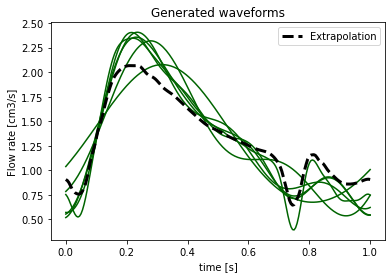

In [16]:
f_list = []
k_list = []


a = [1.75]
b = 1

c = 1
d = 1

for j in a:
    # compute the first coefficient
    A0 = np.sum(fnew*np.ones_like(xnew))*dx/L
    fFS = A0/2 * np.ones_like(fnew)
    #define variables for coefficients
    n_terms = 60 # number of terms in the Fourier series
    A = np.zeros(n_terms)
    B = np.zeros(n_terms)

    for k in range(n_terms):
        A[k] = np.sum(fnew*np.cos(np.pi*(k+1)*xnew/L))*dx/L*j
        B[k] = np.sum(fnew*np.sin(np.pi*(k+1)*xnew/L))*dx/L*b
        fFS = fFS + A[k]*np.cos((k+1)*np.pi*xnew/L*c) + B[k]*np.sin((k+1)*np.pi*xnew/L*d)
        
        if (k >5 and k<20 and k%3==0) or k==n_terms-1:
#         if k==n_terms-1:
            print("a: ",j, "k: ",k)
            f_list.append(fFS)
            k_list.append(k)
    

print('Number of  waveforms generated:',len(f_list))

for i in range(len(f_list)):
    
    
    xfit = xnew[xcutoff:(201+xcutoff)]-xnew[xcutoff]
    ffit = f_list[i][xcutoff:(201+xcutoff)]
    if i <= 6 or i >= 42:  #extrapolation testing
        color = "darkgreen"
        label = "Extrapolation"
        
    elif i>= 25 and i<=30: #interpolation testing
        color = "red"
        label = "Interpolation"
        
    else:                   #training data
        color = "blue"
        label = "Training"
    if i%1==0:
        plt.plot(xfit,ffit, color = color)
#         print(k_list[i])

plt.plot(xnew[:201],fnew[xcutoff:201+xcutoff],'k--', linewidth=3, label = label)
plt.xlabel('time [s]')
plt.ylabel('Flow rate [cm3/s]')
plt.title('Generated waveforms')
plt.legend()

plt.show()

In [21]:
# Save waveforms in a txt file
for i in range(len(f_list)):
    ffit = f_list[i][xcutoff:(201+xcutoff)]
    X = np.stack((xfit, ffit)).T
    
    # make the waveforms exactly periodic
    X[-1, 1] = X[0, 1]
    # save to txt file
    np.savetxt('test_flow_'+str(i+48)+'.txt',X, delimiter = ' ', newline = '\n')

 Create full list for plot

In [11]:
f_list = []
k_list = []


a = [-2,-0.5,0,0.5,1,1.5,1.75,2,2.5]
b = 1

c = 1
d = 1

for j in a:
    # compute the first coefficient
    A0 = np.sum(fnew*np.ones_like(xnew))*dx/L
    fFS = A0/2 * np.ones_like(fnew)
    #define variables for coefficients
    n_terms = 60 # number of terms in the Fourier series
    A = np.zeros(n_terms)
    B = np.zeros(n_terms)

    for k in range(n_terms):
        A[k] = np.sum(fnew*np.cos(np.pi*(k+1)*xnew/L))*dx/L*j
        B[k] = np.sum(fnew*np.sin(np.pi*(k+1)*xnew/L))*dx/L*b
        fFS = fFS + A[k]*np.cos((k+1)*np.pi*xnew/L*c) + B[k]*np.sin((k+1)*np.pi*xnew/L*d)
        
        if (k >5 and k<20 and k%3==0) or k==n_terms-1:
#         if k==n_terms-1:
            print("a: ",j, "k: ",k)
            f_list.append(fFS)
            k_list.append(k)
    

print('Number of  waveforms generated:',len(f_list))

a:  -2 k:  6
a:  -2 k:  9
a:  -2 k:  12
a:  -2 k:  15
a:  -2 k:  18
a:  -2 k:  59
a:  -0.5 k:  6
a:  -0.5 k:  9
a:  -0.5 k:  12
a:  -0.5 k:  15
a:  -0.5 k:  18
a:  -0.5 k:  59
a:  0 k:  6
a:  0 k:  9
a:  0 k:  12
a:  0 k:  15
a:  0 k:  18
a:  0 k:  59
a:  0.5 k:  6
a:  0.5 k:  9
a:  0.5 k:  12
a:  0.5 k:  15
a:  0.5 k:  18
a:  0.5 k:  59
a:  1 k:  6
a:  1 k:  9
a:  1 k:  12
a:  1 k:  15
a:  1 k:  18
a:  1 k:  59
a:  1.5 k:  6
a:  1.5 k:  9
a:  1.5 k:  12
a:  1.5 k:  15
a:  1.5 k:  18
a:  1.5 k:  59
a:  1.75 k:  6
a:  1.75 k:  9
a:  1.75 k:  12
a:  1.75 k:  15
a:  1.75 k:  18
a:  1.75 k:  59
a:  2 k:  6
a:  2 k:  9
a:  2 k:  12
a:  2 k:  15
a:  2 k:  18
a:  2 k:  59
a:  2.5 k:  6
a:  2.5 k:  9
a:  2.5 k:  12
a:  2.5 k:  15
a:  2.5 k:  18
a:  2.5 k:  59
Number of  waveforms generated: 54


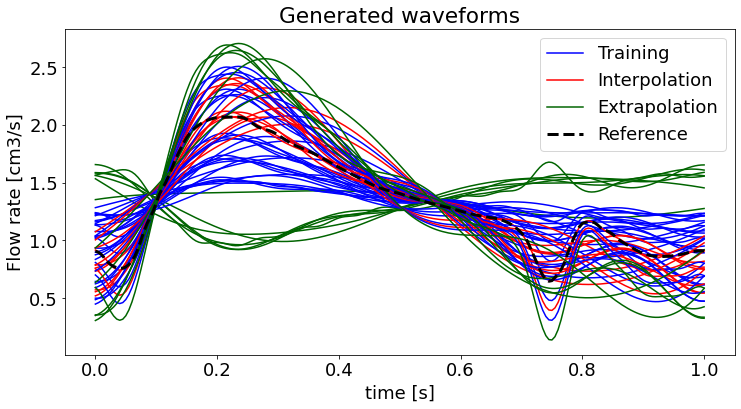

In [17]:
import matplotlib.pyplot as plt

# Your existing code goes here
plt.figure(figsize=(12, 6))
# Create placeholder lines for each category
training_line, = plt.plot([], [], color="blue", label="Training")
interpolation_line, = plt.plot([], [], color="red", label="Interpolation")
extrapolation_line, = plt.plot([], [], color="darkgreen", label="Extrapolation")
original_data_line, = plt.plot([],[], 'k--', linewidth=3, label="Reference")

# Initialize lists to store the data for the legend
legend_data = [training_line, interpolation_line, extrapolation_line, original_data_line]

for i in range(len(f_list)):
    xfit = xnew[xcutoff:(201+xcutoff)] - xnew[xcutoff]
    ffit = f_list[i][xcutoff:(201+xcutoff)]
    if i <= 6 or i>=48:  # extrapolation testing
        color = "darkgreen"
    elif 25 <= i <= 30 or 36< i <=42:  # interpolation testing
        color = "red"
    else:  # training data
        color = "blue"
    if i % 1 == 0:
        plt.plot(xfit, ffit, color=color)

plt.xlabel('time [s]')
plt.ylabel('Flow rate [cm3/s]')
plt.title('Generated waveforms')

original_data_line, = plt.plot(xnew[:201], fnew[xcutoff:201+xcutoff], 'k--', linewidth=3, label="Reference")
# Create the legend with the pre-defined lines and labels
plt.legend(handles=legend_data)
plt.savefig('waveforms.svg', format = 'svg')
plt.show()
